## 데이터 불러오기 및 정제

In [2]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel(io='Online Retail.xlsx')
retail_df = retail_df[retail_df['Country']=='United Kingdom']
retail_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      495478 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.0+ MB


CustomerID 변수에 너무 많은 Null값 존재. Null값을 가진 데이터 제거 필요.

In [9]:
retail_df.dropna(axis=0, subset=['CustomerID'], inplace=True)
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      361878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [10]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


Quantity와 UnitPrice은 음수가 나올 수 없는 변수인데 최솟값이 음수. 음수를 가진 데이터 제거 필요.

In [15]:
retail_df = retail_df[(retail_df['Quantity'] > 0) & (retail_df['UnitPrice'] > 0)]

In [16]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,354321.000000,354321.000000,354321.000000
mean,12.013795,2.963994,15552.486392
std,189.267956,17.862655,1594.527150
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15522.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


## Recency, Frequency, Monetary 열 만들기

In [18]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df

<ipython-input-18-d93add1beced>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sale_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


In [19]:
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)

# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()

In [20]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print(cust_df.shape)
cust_df.head(5)

(3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,3,103,4196.01
2,12748.0,1,4595,33719.73
3,12749.0,4,199,4090.88
4,12820.0,4,59,942.34


## 데이터 변형

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026A78A60880>,
      dtype=object)

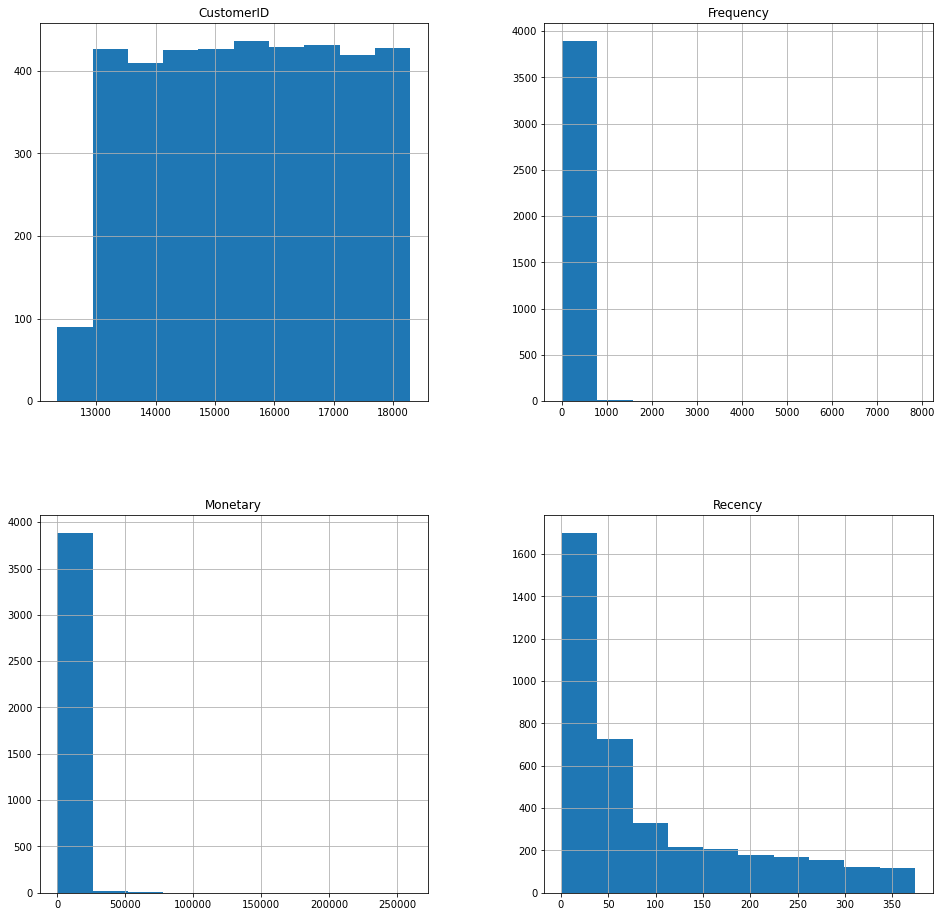

In [23]:
cust_df.hist(figsize=(16, 16))

In [24]:
from sklearn.preprocessing import StandardScaler

def scaleDf(input_df, columns):
    df = input_df.copy()
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026A03634550>,
      dtype=object)

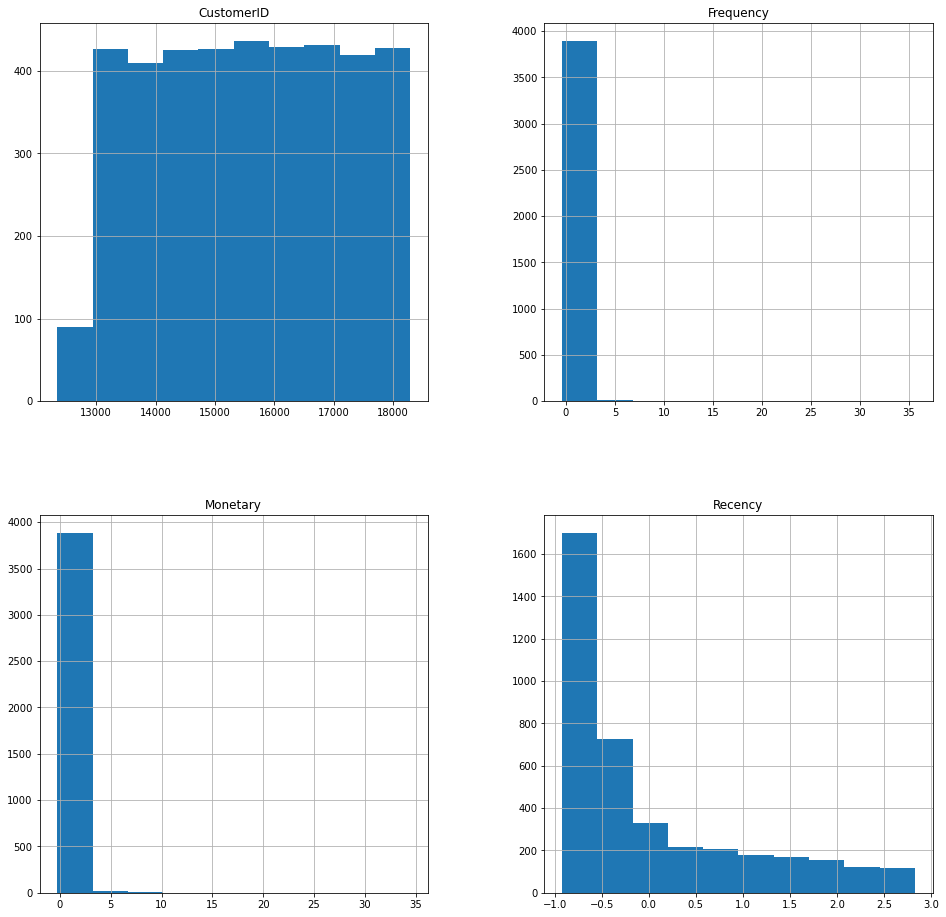

In [27]:
scaled_df = scaleDf(cust_df, ['Frequency', 'Monetary', 'Recency'])
scaled_df.hist(figsize=(16, 16))

## 실루엣 계수로 가장 적절한 군집 개수 구하기

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [33]:
def silhouette_clst(df, n):
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300,random_state=0).fit(df.iloc[:,:4])
    df['cluster']=kmeans.labels_
    score_samples = silhouette_samples(df, df['cluster'])
    df['silhouette_coeff'] = score_samples
    average_score = silhouette_score(df, df['cluster'])
    print('평균 실루엣 계수:{0:.3f}'.format(average_score))
    print(df.groupby('cluster')['silhouette_coeff'].mean())
    
    y_lower=10
    for i in range(n):
        ith_cluster_sil_values = df[df['cluster']==i]['silhouette_coeff'].values
        ith_cluster_sil_values.sort()
        
        size_cluster_i = ith_cluster_sil_values.shape[0]
        y_upper = y_lower + size_cluster_i
            
        color = cm.nipy_spectral(float(i) / n)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                        facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
            
    plt.axvline(x=average_score, color="red", linestyle="--")
    plt.show()
    

평균 실루엣 계수:0.623
cluster
0    0.625150
1    0.620092
Name: silhouette_coeff, dtype: float64


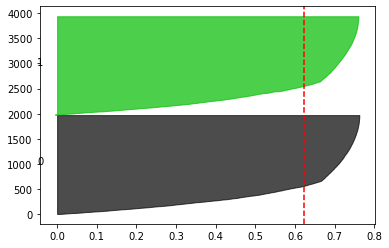

In [34]:
silhouette_clst(scaled_df, 2)

평균 실루엣 계수:0.589
cluster
0    0.620648
1    0.627055
2    0.521824
Name: silhouette_coeff, dtype: float64


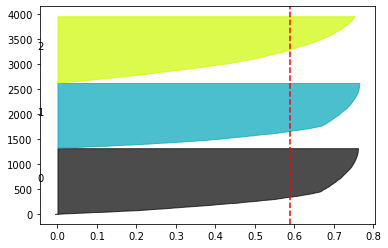

In [35]:
silhouette_clst(scaled_df, 3)

평균 실루엣 계수:0.570
cluster
0    0.511886
1    0.625234
2    0.628915
3    0.516335
Name: silhouette_coeff, dtype: float64


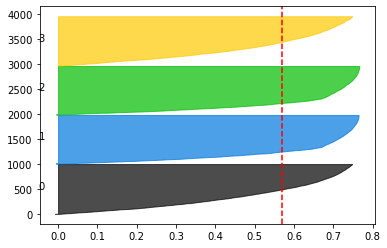

In [36]:
silhouette_clst(scaled_df, 4)

평균 실루엣 계수:0.566
cluster
0    0.521675
1    0.522522
2    0.628032
3    0.525669
4    0.636123
Name: silhouette_coeff, dtype: float64


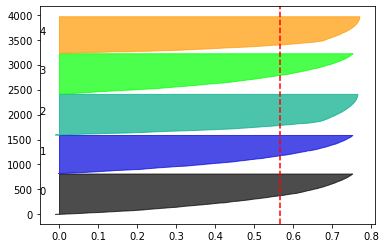

In [37]:
silhouette_clst(scaled_df, 5)

평균 실루엣 계수:0.962
cluster
0    0.964102
1    0.348957
Name: silhouette_coeff, dtype: float64


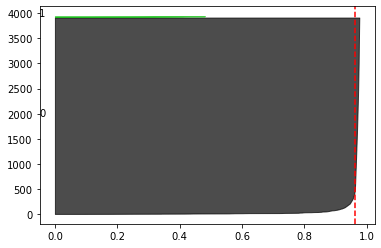

In [38]:
silhouette_clst(cust_df, 2)

평균 실루엣 계수:0.932
cluster
0    0.935560
1    0.613946
2    0.497744
Name: silhouette_coeff, dtype: float64


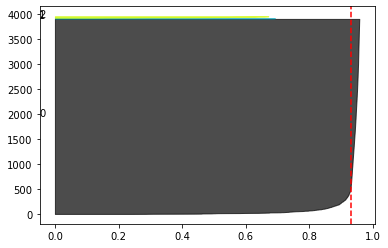

In [39]:
silhouette_clst(cust_df, 3)